In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
data = []
with open("output/kurento_v0/FAST-time-obj-func.tsv") as fd:
    tsvreader = csv.reader(fd, delimiter="\t")
    for i, line in enumerate(tsvreader):
        if i is 0: continue
        data.append([ int(line[0]), float(line[1]), float(line[2]),  float(line[3]) ])

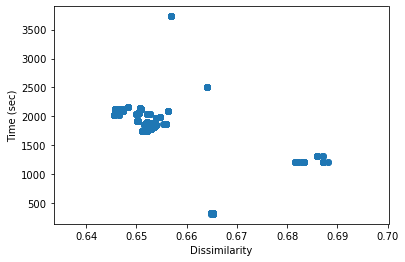

In [3]:
scores = np.array(data)

x = scores[:, 1]
y = scores[:, 2]

plt.scatter(x, y)
plt.xlabel('Dissimilarity')
plt.ylabel('Time (sec)')
plt.show()

In [4]:
def identify_pareto(scores):
    # Count number of items
    population_size = scores.shape[0]
    # Create a NumPy index for scores on the pareto front (zero indexed)
    population_ids = np.arange(population_size)
    # Create a starting list of items on the Pareto front
    # All items start off as being labelled as on the Parteo front
    pareto_front = np.ones(population_size, dtype=bool)
    # Loop through each item. This will then be compared with all other items
    for i in range(population_size):
        # Loop through all other items
        diss = scores[i][1]
        time = scores[i][2]
        for j in range(population_size):
            # Check if our 'i' pint is dominated by out 'j' point         
            if (
                    ( diss < scores[j][1] and time > scores[j][2] ) 
                    or 
                    ( diss == scores[j][1] and time > scores[j][2] )
                    or
                    ( time == scores[j][2] and diss < scores[j][1] )
               ):
                pareto_front[i] = 0
                #print(scores[i],scores[j])
                break

    # Return ids of scenarios on pareto front
    return population_ids[pareto_front]

In [6]:
pareto_front = []
points       = []
pareto       = identify_pareto(scores)
for solution in scores[pareto]:
    point = (solution[1], solution[2], solution[3])
    if point not in points:
        points.append(point)
        pareto_front.append(solution)

#pareto_front = scores[pareto]
print('\nPareto front scores')
for i, a, b, c in pareto_front:
    print(a,b)

print("\nLen: %d"%len(pareto_front))



Pareto front scores
0.665259893057 313.621
0.688194175754 1210.49
0.683360160807 1207.68
0.665337799835 317.871

Len: 4


In [7]:
pareto_front_df = pd.DataFrame(pareto_front)
pareto_front_df.sort_values(1, inplace=True)
pareto_front = pareto_front_df.values
pareto_front_df[0] = pareto_front_df[0].astype(int)
pareto_front_df.rename(columns={0: "SolutionIndex", 1:"Dissimilarity", 2:"Time", 3:"APFD_c"})

,SolutionIndex,Dissimilarity,Time,APFD_c
0,22,0.665260,313.621,13.684510
3,883,0.665338,317.871,13.683287
2,143,0.683360,1207.680,14.032262
1,52,0.688194,1210.490,14.104406


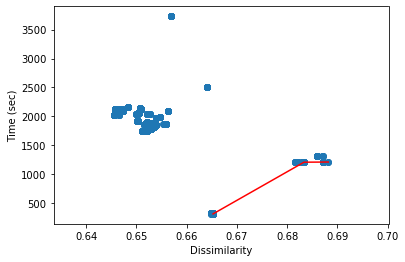

In [8]:
x_all = scores[:, 1]
y_all = scores[:, 2]
x_pareto = pareto_front[:, 1]
y_pareto = pareto_front[:, 2]

plt.scatter(x_all, y_all)
plt.plot(x_pareto, y_pareto, color='r')
plt.xlabel('Dissimilarity')
plt.ylabel('Time (sec)')
plt.show()